In [50]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu118'

### Create device agnostic code

In [51]:
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Device:{device}")

Device:cuda


In [52]:
!nvidia-smi

Thu Apr 24 19:29:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.83                 Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8              5W /   35W |     105MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Create data using Linear Regression model

In [53]:
weight = 0.7
bias = 0.3
torch.manual_seed(42)
X = torch.randn(50).unsqueeze(dim=1)

Y = weight* X + bias
Y,X

(tensor([[ 1.6488],
         [ 1.3411],
         [ 0.9305],
         [-1.1739],
         [ 0.7749],
         [-0.5642],
         [ 0.2699],
         [-0.8233],
         [-0.2265],
         [ 1.4541],
         [ 0.0253],
         [-0.6825],
         [-0.2095],
         [-0.0916],
         [-0.2382],
         [ 0.8337],
         [ 1.4496],
         [ 0.1883],
         [-0.0482],
         [ 0.6077],
         [-0.2307],
         [ 1.0548],
         [ 0.8606],
         [ 1.4764],
         [ 1.1954],
         [ 1.2075],
         [ 0.7273],
         [ 1.2343],
         [ 0.1379],
         [ 0.3292],
         [ 0.1239],
         [ 0.9019],
         [-0.6693],
         [-0.3099],
         [ 0.3546],
         [ 0.6681],
         [-0.0416],
         [ 1.1340],
         [-0.2698],
         [-0.2152],
         [-0.2860],
         [-0.3457],
         [ 0.2556],
         [ 0.7729],
         [ 0.2315],
         [ 1.5912],
         [-0.5292],
         [ 1.2685],
         [-0.5417],
         [ 0.7955]])

In [54]:
split_list = int(0.8*len(X))
x_train = X[:split_list]
y_train = Y[:split_list]

x_test = X[split_list:]
y_test = Y[split_list:]
x_train,x_test,y_train,y_test

(tensor([[ 1.9269],
         [ 1.4873],
         [ 0.9007],
         [-2.1055],
         [ 0.6784],
         [-1.2345],
         [-0.0431],
         [-1.6047],
         [-0.7521],
         [ 1.6487],
         [-0.3925],
         [-1.4036],
         [-0.7279],
         [-0.5594],
         [-0.7688],
         [ 0.7624],
         [ 1.6423],
         [-0.1596],
         [-0.4974],
         [ 0.4396],
         [-0.7581],
         [ 1.0783],
         [ 0.8008],
         [ 1.6806],
         [ 1.2791],
         [ 1.2964],
         [ 0.6105],
         [ 1.3347],
         [-0.2316],
         [ 0.0418],
         [-0.2516],
         [ 0.8599],
         [-1.3847],
         [-0.8712],
         [ 0.0780],
         [ 0.5258],
         [-0.4880],
         [ 1.1914],
         [-0.8140],
         [-0.7360]]),
 tensor([[-0.8371],
         [-0.9224],
         [-0.0635],
         [ 0.6756],
         [-0.0978],
         [ 1.8446],
         [-1.1845],
         [ 1.3835],
         [-1.2024],
         [ 0.7078]

In [55]:
def plot_predictions(x_train_data=x_train,
                     y_train_data=y_train,
                     x_test_data=x_test,
                     y_test_data=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(x_train_data,y_train_data,c="b",label="Training data")
    plt.scatter(x_test_data,y_test_data,c="g",label="Testing data")
    plt.title("Testing and Training data")
    if predictions is not None:
        plt.scatter(x_test_data,predictions,c="r",label="Predictions")
    plt.xlabel("input")
    plt.ylabel("output")
    plt.legend(prop={"size":10})
    plt.show()
    

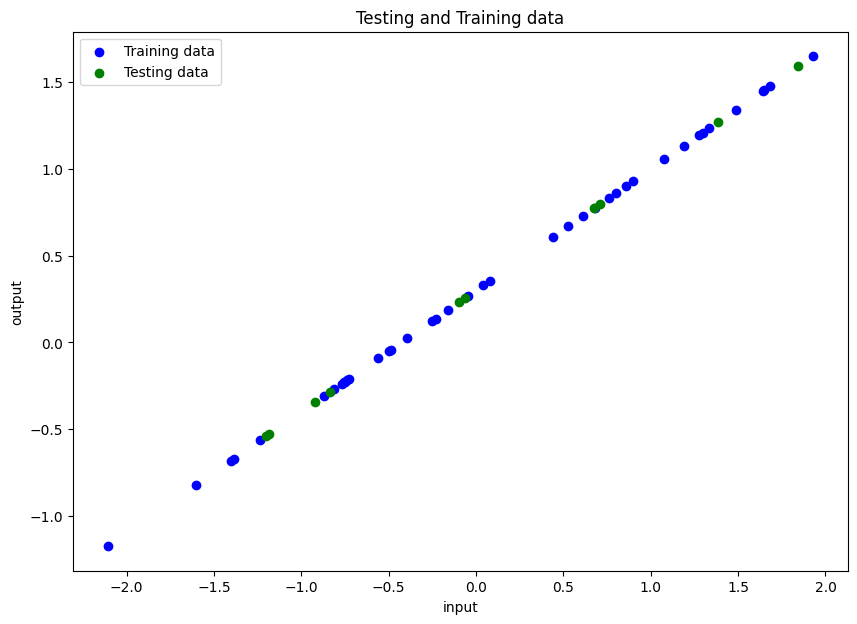

In [56]:
plot_predictions()

### Building the model

In [75]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
torch.manual_seed(42)   
model_0_1 = LinearRegressionModel()
model_0_1,model_0_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [76]:
model_0 = LinearRegressionModel()
torch.manual_seed(42)
with torch.inference_mode():
    y_pred = model_0(x_test)
y_pred

tensor([[1.1147],
        [1.1347],
        [0.9335],
        [0.7603],
        [0.9415],
        [0.4865],
        [1.1961],
        [0.5945],
        [1.2003],
        [0.7528]])

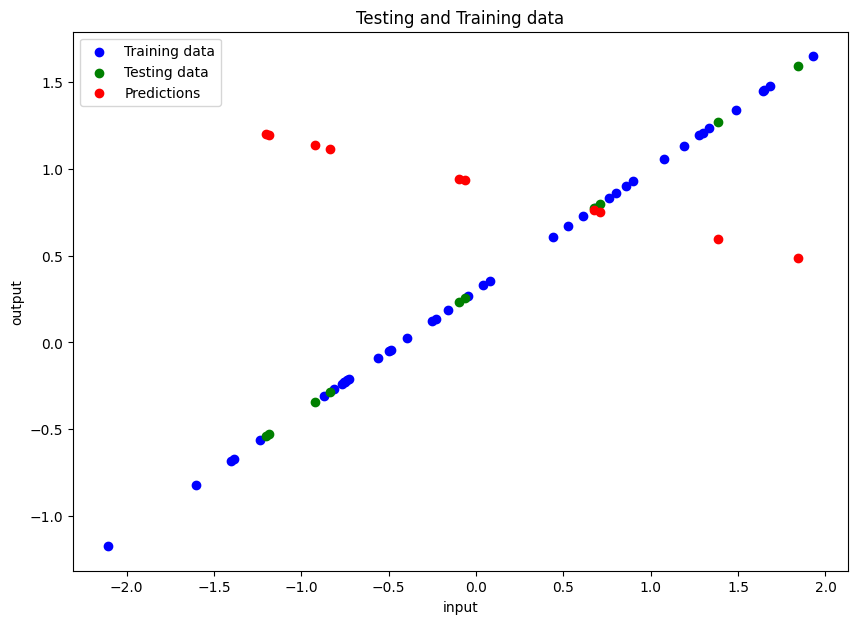

In [77]:
plot_predictions(predictions=y_pred)

### Setting up a Loss and optimizer function


In [78]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_0.parameters(),lr=0.01)

### Building a Training loop

In [79]:
epochs = 200
epoch_list =[]
loss_list =[]
test_loss_list=[]

   # training loop
for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(x_train)

    loss = loss_fn(y_pred,y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()

    # testing loop

    y_test_pred = model_0(x_test)

    test_loss = loss_fn(y_test_pred,y_test)

    if epoch % 10 == 0:
        epoch_list.append(epoch)
        loss_list.append(loss)
        test_loss_list.append(test_loss)
        print(f"Loss:{loss} | test_loss:{test_loss} ")
print(model_0.state_dict())
        


Loss:0.9174121022224426 | test_loss:0.9492508172988892 
Loss:0.8457280993461609 | test_loss:0.8758304715156555 
Loss:0.7754974365234375 | test_loss:0.8076244592666626 
Loss:0.7052667737007141 | test_loss:0.7414810061454773 
Loss:0.6374890208244324 | test_loss:0.6746833324432373 
Loss:0.5717217326164246 | test_loss:0.6073489785194397 
Loss:0.5063556432723999 | test_loss:0.5399435758590698 
Loss:0.44236811995506287 | test_loss:0.47225457429885864 
Loss:0.37921375036239624 | test_loss:0.4043591618537903 
Loss:0.3162301480770111 | test_loss:0.336440771818161 
Loss:0.2532464861869812 | test_loss:0.2685224115848541 
Loss:0.19026297330856323 | test_loss:0.2006041556596756 
Loss:0.12779825925827026 | test_loss:0.1328444480895996 
Loss:0.06609348207712173 | test_loss:0.06544271856546402 
Loss:0.004994732793420553 | test_loss:0.001735389232635498 
Loss:0.006411425769329071 | test_loss:0.001735389232635498 
Loss:0.006411425769329071 | test_loss:0.001735389232635498 
Loss:0.006411425769329071 | te

In [83]:
with torch.inference_mode():
    y_pred_new = model_0(x_test)
y_pred_new , y_test

(tensor([[-0.2794],
         [-0.3385],
         [ 0.2566],
         [ 0.7687],
         [ 0.2328],
         [ 1.5787],
         [-0.5202],
         [ 1.2593],
         [-0.5326],
         [ 0.7911]]),
 tensor([[-0.2860],
         [-0.3457],
         [ 0.2556],
         [ 0.7729],
         [ 0.2315],
         [ 1.5912],
         [-0.5292],
         [ 1.2685],
         [-0.5417],
         [ 0.7955]]))

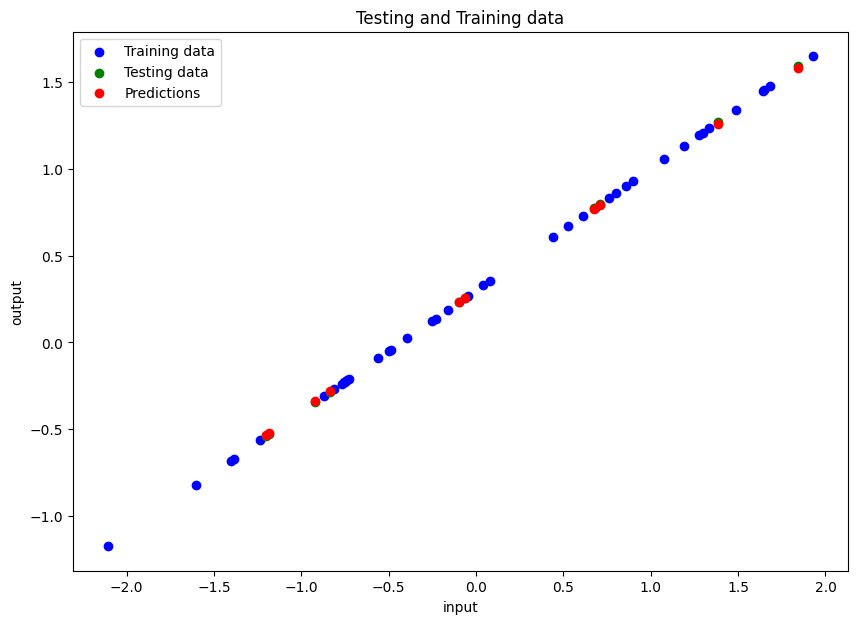

In [84]:
plot_predictions(predictions=y_pred_new)

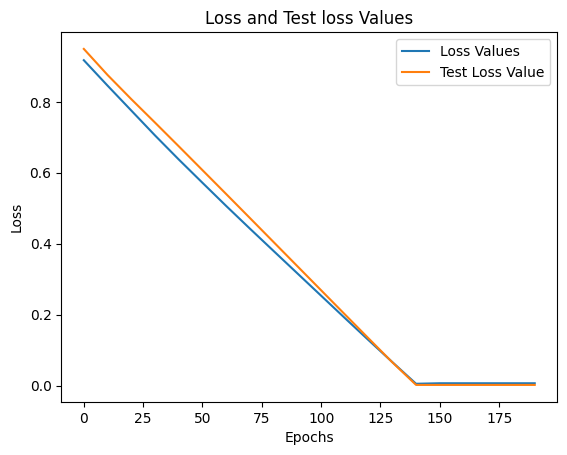

In [82]:
import numpy as np

plt.plot(epoch_list,torch.Tensor(loss_list).numpy(),label="Loss Values")
plt.plot(epoch_list,torch.Tensor(test_loss_list).numpy(),label="Test Loss Value")
plt.title("Loss and Test loss Values")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


### Saving a Model


In [88]:
from pathlib import Path

save_dir = Path("Models")

save_dir.mkdir(parents=True,exist_ok=True)

save_path = save_dir/"LinearRegressionModel.pth"

torch.save(obj=model_0.state_dict(),f=save_path)

### Loading The model



In [92]:

torch.manual_seed(42)
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(save_path))

loaded_model_0.state_dict()



OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.3006]))])

In [94]:
#### Making Predictions Based on Loaded data 

loaded_model_0.eval()

with torch.inference_mode():
    loaded_y_pred = loaded_model_0(x_test)

loaded_y_pred,y_pred_new

(tensor([[-0.2794],
         [-0.3385],
         [ 0.2566],
         [ 0.7687],
         [ 0.2328],
         [ 1.5787],
         [-0.5202],
         [ 1.2593],
         [-0.5326],
         [ 0.7911]]),
 tensor([[-0.2794],
         [-0.3385],
         [ 0.2566],
         [ 0.7687],
         [ 0.2328],
         [ 1.5787],
         [-0.5202],
         [ 1.2593],
         [-0.5326],
         [ 0.7911]]))

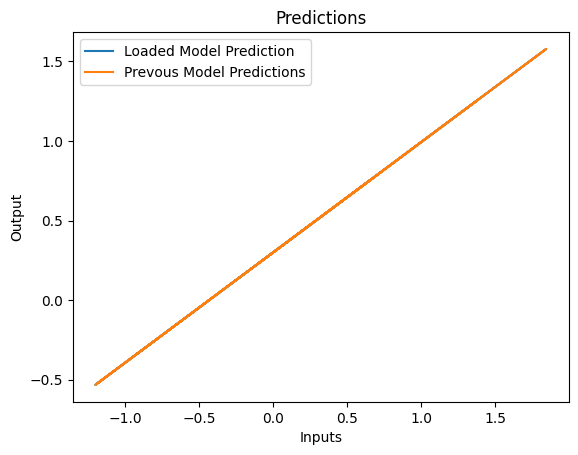

In [98]:

plt.plot(x_test,loaded_y_pred,label="Loaded Model Prediction")
plt.plot(x_test,y_pred_new,label="Prevous Model Predictions")
plt.title("Predictions")
plt.xlabel("Inputs")
plt.ylabel("Output")
plt.legend()